# Homework 2
## Author: Siddhant Madan

### Import libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Fetch data

Get the time series for the following cryptocurrencies from `cryptowat.ch` starting from 2021-11-22, hourly data
1. ETH
2. SOL
3. AVAX
4. USDT
5. FLOW

In [2]:
def get_data(token):
    
    # List of all exchanges to pull the data from
    exchanges = ['coinbase-pro', 'kraken']
    
    # Check for availability of data for the token from all exchanges; if response is ok, break
    for exchange in exchanges:
        res = requests.get(f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
                       params={'periods': '3600', 'after': str(int(pd.Timestamp('2021-11-22').timestamp()))})
        if res.ok:
            df = pd.DataFrame(res.json()['result']['3600'], columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD'])
            df['ts'] = pd.to_datetime(df.ts, unit='s')
            df['token'] = token
            break

    return df

tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

# Get data for all the tokens and concatenate them into a dataframe
df = pd.concat(get_data(token) for token in tokens)
df.set_index('ts', inplace=True)
df.head(10)

,open,high,low,close,volume,volumeUSD,token
ts,,,,,,,
2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH
2021-11-22 05:00:00,4168.35,4186.49,4151.32,4158.06,3897.508536,1.625787e+07,ETH
2021-11-22 06:00:00,4157.70,4187.42,4128.04,4187.42,5802.716761,2.415259e+07,ETH
2021-11-22 07:00:00,4187.67,4189.52,4163.70,4182.49,3299.589361,1.379359e+07,ETH
2021-11-22 08:00:00,4182.54,4220.48,4180.13,4190.73,3316.448902,1.394386e+07,ETH


### Sort tokens by dollar volume traded

Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

,volumeUSD
token,
ETH,2.426931e+10
SOL,7.953929e+09
AVAX,4.205593e+09
USDT,2.189190e+09
FLOW,9.486314e+07


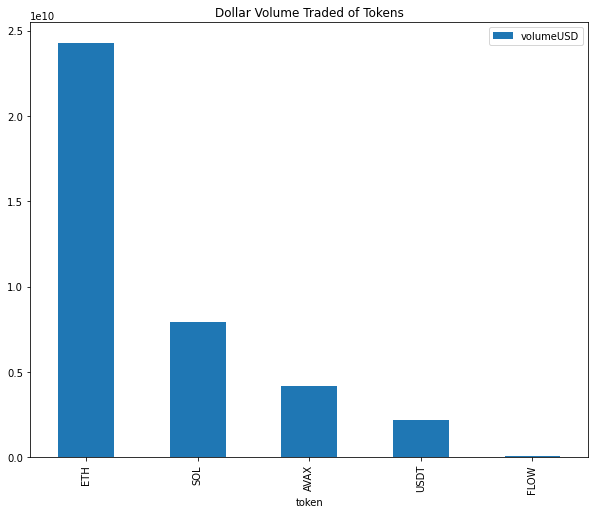

In [3]:
tokens_ranked_by_volume = df.groupby(by='token')[['volumeUSD']].sum().sort_values(by='volumeUSD', ascending=False)
tokens_ranked_by_volume
_ = tokens_ranked_by_volume.plot(kind='bar', title='Dollar Volume Traded of Tokens', figsize=(10, 8))

### Calculate close price ratio of ETH and SOL

Add a column that calculates the close price ratio between ETH and SOL for each hour (i.e. close price of ETH / close price of SOL for each period)

In [4]:
close_ratio = df[df['token']=='ETH']['close'] / df[df['token']=='SOL']['close']
close_ratio = close_ratio.rename('close of ETH by close of SOL')
df = df.merge(close_ratio, how='left', left_index=True, right_index=True)
df.head(10)

,open,high,low,close,volume,volumeUSD,token,close of ETH by close of SOL
ts,,,,,,,,
2021-11-22 00:00:00,4317.9800,4342.2400,4246.0700,4262.9900,7.262563e+03,3.123077e+07,ETH,18.471694
2021-11-22 00:00:00,230.4830,234.6880,228.8050,230.7850,9.353180e+04,2.172284e+07,SOL,18.471694
2021-11-22 00:00:00,131.6900,133.7900,127.7000,128.6700,9.686748e+04,1.267080e+07,AVAX,18.471694
2021-11-22 00:00:00,1.0010,1.0017,1.0009,1.0012,9.987681e+06,9.999090e+06,USDT,18.471694
2021-11-22 00:00:00,13.8870,14.1690,13.8870,14.1500,2.326138e+04,3.274755e+05,FLOW,18.471694
2021-11-22 01:00:00,4263.0400,4270.3400,4212.4500,4234.3700,8.437946e+03,3.574586e+07,ETH,18.736150
2021-11-22 01:00:00,230.7520,232.2690,225.0520,226.0000,8.884100e+04,2.017188e+07,SOL,18.736150
2021-11-22 01:00:00,128.7600,135.2900,126.2500,134.8500,1.471799e+05,1.915462e+07,AVAX,18.736150
2021-11-22 01:00:00,1.0012,1.0014,1.0012,1.0013,7.766318e+06,7.775823e+06,USDT,18.736150


### Rename two columns with volume data

Change the name of the `volume` and `volumeUSD` columns to `volumeBase` and `volumeTerm`

In [5]:
df = df.rename(columns={'volume': 'volumeBase', 'volumeUSD': 'volumeTerm'})
df.head(10)

,open,high,low,close,volumeBase,volumeTerm,token,close of ETH by close of SOL
ts,,,,,,,,
2021-11-22 00:00:00,4317.9800,4342.2400,4246.0700,4262.9900,7.262563e+03,3.123077e+07,ETH,18.471694
2021-11-22 00:00:00,230.4830,234.6880,228.8050,230.7850,9.353180e+04,2.172284e+07,SOL,18.471694
2021-11-22 00:00:00,131.6900,133.7900,127.7000,128.6700,9.686748e+04,1.267080e+07,AVAX,18.471694
2021-11-22 00:00:00,1.0010,1.0017,1.0009,1.0012,9.987681e+06,9.999090e+06,USDT,18.471694
2021-11-22 00:00:00,13.8870,14.1690,13.8870,14.1500,2.326138e+04,3.274755e+05,FLOW,18.471694
2021-11-22 01:00:00,4263.0400,4270.3400,4212.4500,4234.3700,8.437946e+03,3.574586e+07,ETH,18.736150
2021-11-22 01:00:00,230.7520,232.2690,225.0520,226.0000,8.884100e+04,2.017188e+07,SOL,18.736150
2021-11-22 01:00:00,128.7600,135.2900,126.2500,134.8500,1.471799e+05,1.915462e+07,AVAX,18.736150
2021-11-22 01:00:00,1.0012,1.0014,1.0012,1.0013,7.766318e+06,7.775823e+06,USDT,18.736150


### Pivot table to get close price of all tokens for all timestamps

Create a fat table indexed by the timestamp, and each column is the close price of each token

In [6]:
close_prices = df.pivot_table(values='close', index='ts', columns='token')
close_prices.head(10)

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 00:00:00,128.67,4262.99,14.150,230.785,1.0012
2021-11-22 01:00:00,134.85,4234.37,13.621,226.000,1.0013
2021-11-22 02:00:00,132.54,4217.89,13.753,227.037,1.0012
2021-11-22 03:00:00,133.38,4193.47,13.652,223.117,1.0011
2021-11-22 04:00:00,136.29,4168.35,13.581,220.652,1.0009
2021-11-22 05:00:00,132.02,4158.06,13.392,217.332,1.0008
2021-11-22 06:00:00,134.93,4187.42,13.548,222.500,1.0008
2021-11-22 07:00:00,135.29,4182.49,13.444,219.513,1.0009
2021-11-22 08:00:00,131.98,4190.73,14.596,216.385,1.0008


### Get log returns of the tokens

Calculate the hour by hour log return of the close price of each token (return is calculated by $np.log(price_t / price_{t-1})$)

In [7]:
log_returns = np.log(close_prices / close_prices.shift())
log_returns.head(10)

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,0.046912,-0.006736,-0.038102,-0.020952,0.0001
2021-11-22 02:00:00,-0.017279,-0.003900,0.009644,0.004578,-0.0001
2021-11-22 03:00:00,0.006318,-0.005806,-0.007371,-0.017417,-0.0001
2021-11-22 04:00:00,0.021583,-0.006008,-0.005214,-0.011109,-0.0002
2021-11-22 05:00:00,-0.031832,-0.002472,-0.014014,-0.015161,-0.0001
2021-11-22 06:00:00,0.021803,0.007036,0.011581,0.023501,0.0000
2021-11-22 07:00:00,0.002664,-0.001178,-0.007706,-0.013516,0.0001
2021-11-22 08:00:00,-0.024770,0.001968,0.082215,-0.014352,-0.0001


### Calculate correlation in the returns of the tokens

Calculate the correlation of the tokens using the table above

In [8]:
log_returns.corr()

token,AVAX,ETH,FLOW,SOL,USDT
token,,,,,
AVAX,1.000000,0.653981,0.402383,0.645749,0.011268
ETH,0.653981,1.000000,0.584489,0.755723,-0.092707
FLOW,0.402383,0.584489,1.000000,0.474144,-0.177542
SOL,0.645749,0.755723,0.474144,1.000000,0.109188
USDT,0.011268,-0.092707,-0.177542,0.109188,1.000000


### Visualize correlation in returns of the tokens

Visualize the correlation in a matplpotlib plot

#### Correlation Heatmap

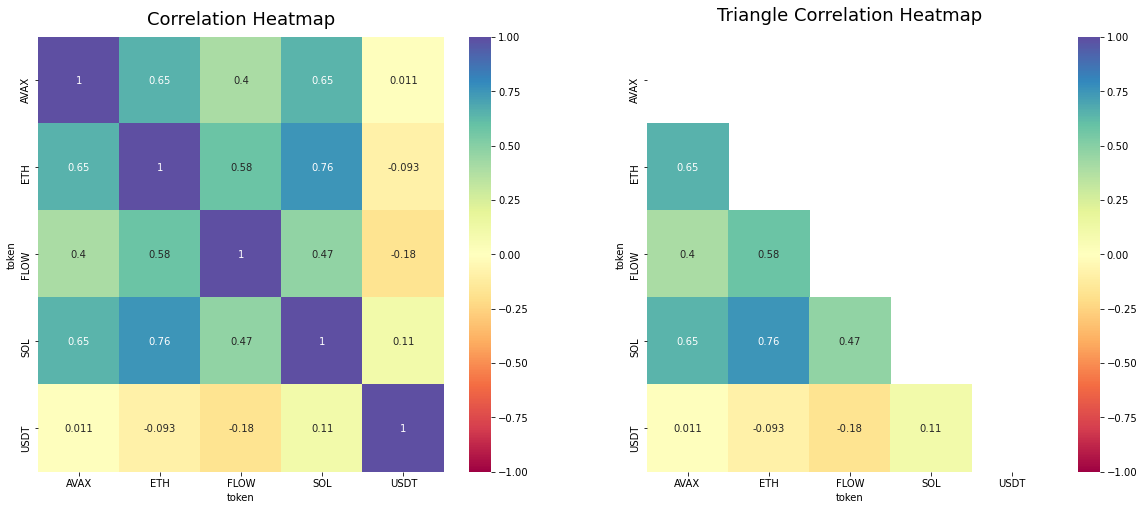

In [9]:
_ = plt.figure(figsize=(20, 8))

_ = plt.subplot(1, 2, 1)
heatmap = sns.heatmap(log_returns.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')
_ = heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

_ = plt.subplot(1, 2, 2)
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(log_returns.corr(), dtype=np.bool))
heatmap = sns.heatmap(log_returns.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Spectral')
_ = heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

#### Correlation Pairplot

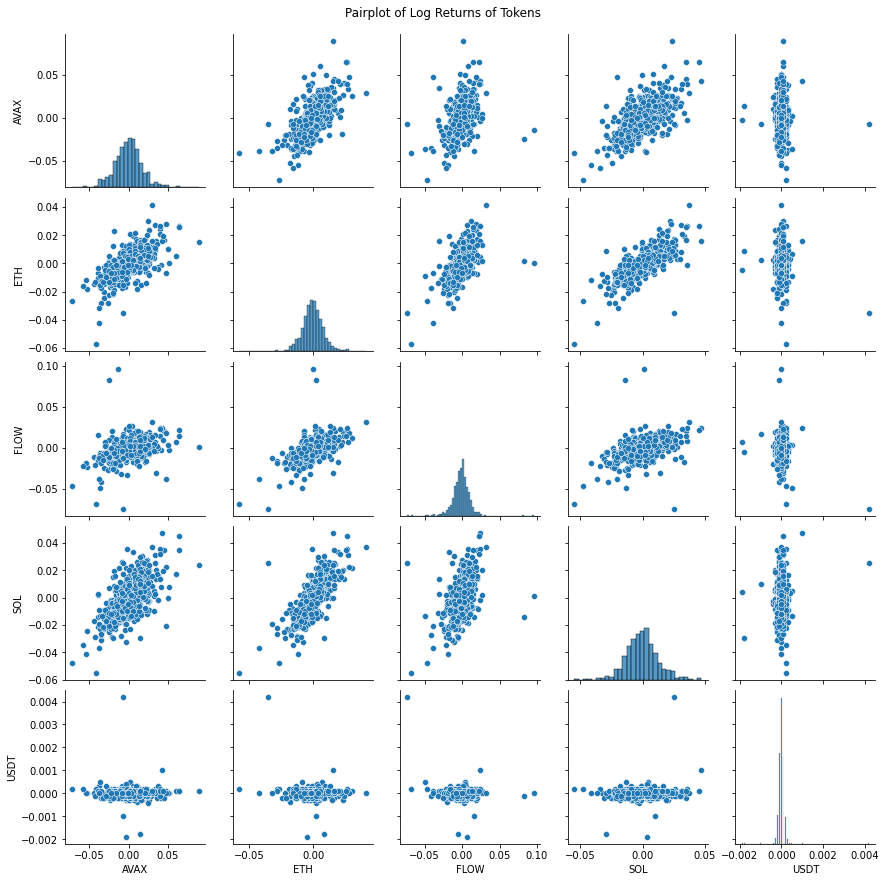

In [10]:
pair_plot = sns.pairplot(log_returns)
_ = pair_plot.fig.suptitle('Pairplot of Log Returns of Tokens')
_ = pair_plot.fig.subplots_adjust(top=0.95)